In [ ]:
import pandas as pd
import glob

# Ruta de los archivos CSV
ruta_archivos = "/ejercicio1/QQP/*.csv"

#schema a definir de los archivos
headers = ["PRODUCTO", "PRESENTACION", "MARCA", "CATEGORIA", "CATALOGO", "PRECIO", "FECHAREGISTRO", 
           "CADENACOMERCIAL", "GIRO", "NOMBRECOMERCIAL", "DIRECCION", "ESTADO", "MUNICIPIO", "LATITUD", "LONGITUD"]

# Obtén una lista de todos los archivos CSV en la ruta especificada
archivos_csv = glob.glob(ruta_archivos)


# Lee cada archivo CSV y agrega los encabezados
dataframes = []
for archivo in archivos_csv:
    print(archivo)
    df = pd.read_csv(archivo, header=None, names=headers)
    dataframes.append(df)

#Se concatenan todos los archivos leidos
df_concatenado = pd.concat(dataframes, ignore_index=True)

# Imprimir el dataframe concatenado para verificar
#print(df_concatenado)

#df_concatenado.to_csv('/Users/sandra.palmer/Documents/code/GitHub/PoC-gepp-clientes-potenciales/Notebooks de pruebas/kvak/OUTPUT/archivo_concatenado.csv', index=False)



In [46]:
# Esquema del DF
df_concatenado.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6212832 entries, 0 to 6212831
Data columns (total 15 columns):
 #   Column           Dtype  
---  ------           -----  
 0   PRODUCTO         object 
 1   PRESENTACION     object 
 2   MARCA            object 
 3   CATEGORIA        object 
 4   CATALOGO         object 
 5   PRECIO           float64
 6   FECHAREGISTRO    object 
 7   CADENACOMERCIAL  object 
 8   GIRO             object 
 9   NOMBRECOMERCIAL  object 
 10  DIRECCION        object 
 11  ESTADO           object 
 12  MUNICIPIO        object 
 13  LATITUD          float64
 14  LONGITUD         float64
dtypes: float64(3), object(12)
memory usage: 711.0+ MB


In [47]:
num_registros_len = len(df_concatenado)
print(f"¿Cuántos registros hay? {num_registros_len}")


¿Cuántos registros hay? 6212832


In [48]:
num_categorias = df_concatenado['CATEGORIA'].nunique()
print(f"¿Cuántas categorías? {num_categorias}")

df_concatenado['CATEGORIA'].unique()

¿Cuántas categorías? 42


array(['HORTALIZAS FRESCAS', 'FRUTAS FRESCAS',
       'PRODUCTOS DE TEMPORADA (NAVIDEÑOS)', 'MEDICAMENTOS',
       'ACEITES Y GRASAS VEG. COMESTIBLES',
       'ARTS. PARA EL CUIDADO PERSONAL', 'REFRESCOS ENVASADOS',
       'FRUTAS Y LEGUMBRES PROCESADAS', 'ARROZ Y CEREALES PREPARADOS',
       'APARATOS ELECTRONICOS', 'APARATOS ELECTRICOS',
       'PESCADOS Y MARISCOS EN CONSERVA', 'AZUCAR', 'PESCADOS Y MARISCOS',
       'DETERGENTES Y PRODUCTOS SIMILARES', 'CAFE',
       'CHOCOLATES Y GOLOSINAS', 'CARNE Y VISCERAS DE CERDO',
       'CARNES FRIAS SECAS Y EMBUTIDOS', 'CARNE DE AVE',
       'CARNE Y VISCERAS DE RES', 'CERVEZA', 'LEGUMBRES SECAS',
       'CONDIMENTOS', 'DERIVADOS DE LECHE',
       'ARTS. DE ESPARCIMIENTO (JUGUETES)', 'LECHE PROCESADA',
       'GALLETAS PASTAS Y HARINAS DE TRIGO',
       'TORTILLAS Y DERIVADOS DEL MAIZ', 'HUEVO', 'LECHE FRESCA',
       'UTENSILIOS DOMESTICOS', 'PAN',
       'ARTS. DE PAPEL P/HIGIENE PERSONAL', 'ALIMENTOS COCINADOS F/CASA',
       'VINOS Y L

In [49]:
num_cad_comerciales = df_concatenado['CADENACOMERCIAL'].nunique()
print(f"¿Cuántas cadenas comerciales están siendo monitoreadas? {num_cad_comerciales}")

df_concatenado['CADENACOMERCIAL'].unique()

¿Cuántas cadenas comerciales están siendo monitoreadas? 213


array(['CENTRAL DE ABASTOS', 'CHEDRAUI', 'ELEKTRA', 'FARMACIA', 'OXXO',
       'TORTILLERIAS TRADICIONALES', 'COPPEL', 'BENAVIDES',
       'MERCADO PUBLICO', 'PESCADERIAS', 'HIPERMERCADO SORIANA',
       'LIVERPOOL', 'WAL-MART', 'BODEGA AURRERA', 'FARMACIA GUADALAJARA',
       'FARMACIAS DEL AHORRO', 'FARMACIAS DE SIMILARES', 'MEGA SORIANA',
       'MERCADO J. JESUS TERAN', 'SEARS ROEBUCK DE MEXICO',
       'PESCADERIAS TRADICIONALES', 'FARMACIA PEY PHARMA',
       'SORIANA SUPER', 'CALIMAX', 'FARMACIA EL SOL', 'FARMACIA YZA',
       'SALINAS Y ROCHA', 'MERCADO MIGUEL HIDALGO', 'SUPERMERCADOS LEY',
       'SANBORN S HNOS.', 'CASA LEY', 'FARMACIAS ESPECIALIZADAS',
       'FARMACIA EMERGENCIAS', 'SORIANA EXPRESS', 'ULTRA HOGAR',
       'COLCHONES Y MUEBLES DE CAMPECHE', 'MINISUPER', 'ALSUPER STORE',
       'S MART', 'MERCADO SORIANA', 'MUEBLERIAS', 'MUEBLERIAS PORTILLO',
       'SUPERMERCADO GONZALEZ', 'LA COMER', 'PANADERIAS TRADICIONALES',
       'SUMESA', 'WAL-MART EXPRESS', 'BODEGA A

In [50]:
print ("¿Cuáles son los productos más monitoreados en cada estado de la república?")

grouped = df_concatenado.groupby(['ESTADO', 'PRODUCTO']).size().reset_index(name='nRows')

grouped_sorted = grouped.sort_values(['ESTADO', 'nRows'], ascending=[True, False])

#Producto mas monitoreado por estado
top_products_by_state = grouped_sorted.groupby('ESTADO').first().reset_index()

print(top_products_by_state)

¿Cuáles son los productos más monitoreados en cada estado de la república?
                  ESTADO         PRODUCTO  nRows
0         AGUASCALIENTES         REFRESCO   2262
1        BAJA CALIFORNIA         REFRESCO   2745
2    BAJA CALIFORNIA SUR         REFRESCO   3299
3               CAMPECHE         REFRESCO   2350
4                CHIAPAS            JAMON   1464
5              CHIHUAHUA         REFRESCO   4784
6       CIUDAD DE MÉXICO         REFRESCO  39163
7   COAHUILA DE ZARAGOZA         REFRESCO   2197
8                DURANGO         REFRESCO   2148
9       ESTADO DE MÉXICO         REFRESCO  24765
10            GUANAJUATO         REFRESCO   7143
11              GUERRERO         REFRESCO   2039
12               HIDALGO         REFRESCO    773
13               JALISCO         REFRESCO   6107
14   MICHOACÁN DE OCAMPO         REFRESCO   2954
15               MORELOS         REFRESCO   3150
16            NUEVO LEÓN         REFRESCO   4951
17                OAXACA         REFRESCO  

In [51]:
unique_products = df_concatenado.groupby('CADENACOMERCIAL')['PRODUCTO'].nunique().reset_index()
unique_products = unique_products.rename(columns={'PRODUCTO': 'unique_products_count'})
sorted_unique_products = unique_products.sort_values('unique_products_count', ascending=False)

print(f"¿Cuál es la cadena comercial con mayor variedad de productos monitoreados? {sorted_unique_products.iloc[0]['CADENACOMERCIAL']}")

sorted_unique_products


¿Cuál es la cadena comercial con mayor variedad de productos monitoreados? HIPERMERCADO SORIANA


,CADENACOMERCIAL,unique_products_count
83,HIPERMERCADO SORIANA,758
99,MEGA SORIANA,753
17,CHEDRAUI,746
192,SORIANA,741
91,LA COMER,741
...,...,...
128,OPERADORA PRISSA,4
77,GAMERS,2
209,VINATERIAS,2
76,GAME PLANET,2


In [61]:
print("Encuentra algún dato curioso en los datos y comunícalo en un slide de powerpoint.")

df_concatenado['FECHAREGISTRO'] = pd.to_datetime(df_concatenado['FECHAREGISTRO'])

price_variation = df_concatenado.groupby('CATEGORIA')['PRECIO'].agg(price_variation=pd.Series.std).reset_index()

price_variation_sorted = price_variation.sort_values(by='price_variation', ascending=False)


print(price_variation_sorted)



Encuentra algún dato curioso en los datos y comunícalo en un slide de powerpoint.
                             CATEGORIA  price_variation
3                  APARATOS ELECTRICOS      6787.048891
4                APARATOS ELECTRONICOS      6218.060235
6    ARTS. DE ESPARCIMIENTO (JUGUETES)      4293.791704
40               UTENSILIOS DOMESTICOS       820.724900
32                        MEDICAMENTOS       599.233132
8       ARTS. PARA EL CUIDADO PERSONAL       166.413408
34                 PESCADOS Y MARISCOS       132.113330
36  PRODUCTOS DE TEMPORADA (NAVIDEÑOS)       106.929210
7    ARTS. DE PAPEL P/HIGIENE PERSONAL       102.651249
41                     VINOS Y LICORES        87.159356
14      CARNES FRIAS SECAS Y EMBUTIDOS        84.220294
19                  DERIVADOS DE LECHE        76.961985
31                    MATERIAL ESCOLAR        74.542456
13             CARNE Y VISCERAS DE RES        71.879979
29                     LECHE PROCESADA        61.751391
35     PESCADOS Y MARI

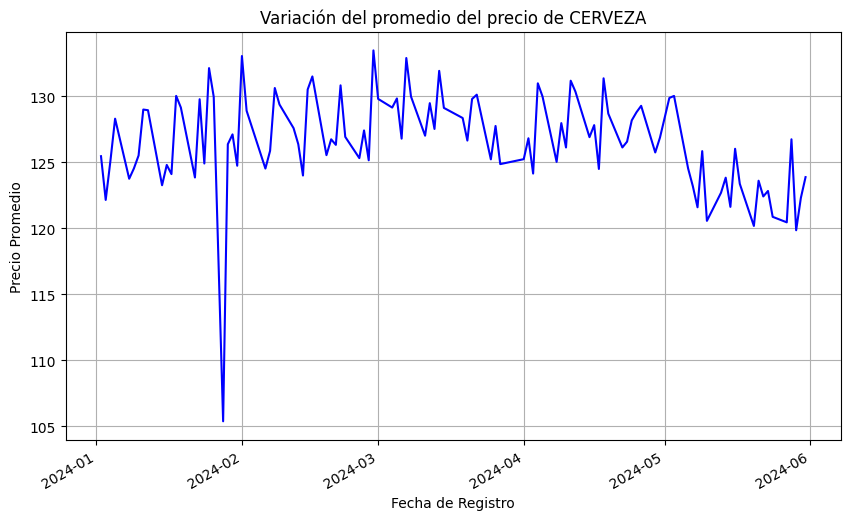

In [62]:
import matplotlib.pyplot as plt
camaras_digitales_df = df_concatenado[df_concatenado['CATEGORIA'] == 'CERVEZA']

# 2. Agrupar por FECHAREGISTRO y calcular el promedio del precio para cada fecha
camaras_digitales_promedio_precio = camaras_digitales_df.groupby('FECHAREGISTRO')['PRECIO'].mean()

# 3. Crear un gráfico de línea para visualizar la variación del promedio del precio a lo largo del tiempo
plt.figure(figsize=(10, 6))
camaras_digitales_promedio_precio.plot(kind='line', color='blue')
plt.title('Variación del promedio del precio de CERVEZA')
plt.xlabel('Fecha de Registro')
plt.ylabel('Precio Promedio')
plt.grid(True)
plt.show()

In [63]:
# 1. Filtrar el DataFrame para obtener solo las filas donde PRODUCTO sea igual a 'CAMARAS DIGITALES'
camaras_digitales_df = df_concatenado[df_concatenado['CATEGORIA'] == 'CERVEZA']


# 2. Agrupar por FECHAREGISTRO, CADENACOMERCIAL y ESTADO, y calcular el precio promedio para cada grupo
precio_promedio_por_fecha_cadena_estado = camaras_digitales_df.groupby(['FECHAREGISTRO', 'CADENACOMERCIAL', 'ESTADO'])['PRECIO'].mean().reset_index()

# 3. Encontrar la fila con el precio promedio más bajo y más alto
precio_minimo = precio_promedio_por_fecha_cadena_estado.loc[precio_promedio_por_fecha_cadena_estado['PRECIO'].idxmin()]
precio_maximo = precio_promedio_por_fecha_cadena_estado.loc[precio_promedio_por_fecha_cadena_estado['PRECIO'].idxmax()]

# 4. Extraer la fecha, cadena y estado de esas filas
fecha_mas_bajo = precio_minimo['FECHAREGISTRO']
cadena_mas_bajo = precio_minimo['CADENACOMERCIAL']
estado_mas_bajo = precio_minimo['ESTADO']
precio_mas_bajo = precio_minimo['PRECIO']

fecha_mas_alto = precio_maximo['FECHAREGISTRO']
cadena_mas_alto = precio_maximo['CADENACOMERCIAL']
estado_mas_alto = precio_maximo['ESTADO']
precio_mas_alto = precio_maximo['PRECIO']

print("Fecha, cadena y estado con el precio promedio más bajo:")
print("Fecha:", fecha_mas_bajo)
print("Cadena Comercial:", cadena_mas_bajo)
print("Estado:", estado_mas_bajo)
print("Precio Promedio:", precio_mas_bajo)

print("\nFecha, cadena y estado con el precio promedio más alto:")
print("Fecha:", fecha_mas_alto)
print("Cadena Comercial:", cadena_mas_alto)
print("Estado:", estado_mas_alto)
print("Precio Promedio:", precio_mas_alto)


Fecha, cadena y estado con el precio promedio más bajo:
Fecha: 2024-03-25 00:00:00
Cadena Comercial: OXXO
Estado: TAMAULIPAS
Precio Promedio: 40.5

Fecha, cadena y estado con el precio promedio más alto:
Fecha: 2024-01-23 00:00:00
Cadena Comercial: OXXO
Estado: QUINTANA ROO
Precio Promedio: 256.1666666666667
